In [51]:
import os
import datetime
import pygrib
import pickle
import numpy as np
import pygrib
import matplotlib.pyplot as plt
cur_location = os.getcwd()

Step1. setting up beginning and ending date.

In [52]:
start_date = datetime.date(2021, 3, 1)
end_date = datetime.date(2021, 11, 1)
time_between_dates = end_date - start_date
days_between_dates = time_between_dates.days

Step2. collect the cloudtop and VIL by using the maximum values of the entire matrix. And plot them saparately for each 15 mins.

In [53]:
entire_cloudtop={}
entire_VIL={}
for i in range(days_between_dates):
    current_date = start_date + datetime.timedelta(days=i)
    with open(cur_location+'/hrrrdata2021/hrrr{}.dat'.format(current_date), 'rb') as f:
        (cloudtop, VIL, names) = pickle.load(f)
    for h in range(24):
        for m in [0,15,30,45]:
            cur_time = h*100+m
            stamp = str(current_date)+'-'+str(cur_time)
            entire_cloudtop[stamp]=np.max(cloudtop[cur_time])
            entire_VIL[stamp]=np.max(VIL[cur_time])

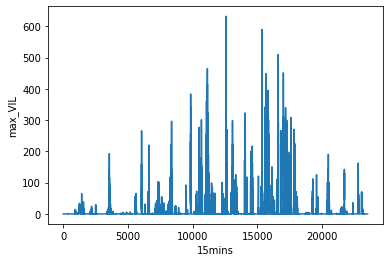

In [54]:
plt.plot(entire_VIL.values())
plt.ylabel('max_VIL')
plt.xlabel('15mins')
plt.show()

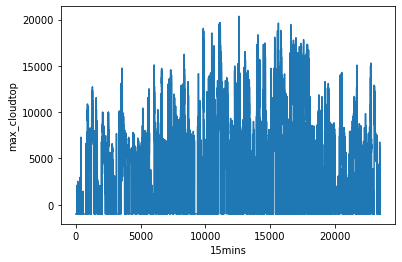

In [55]:
plt.plot(entire_cloudtop.values())
plt.ylabel('max_cloudtop')
plt.xlabel('15mins')
plt.show()

Step3. collect the cloudtop and VIL by using the maximum values of the entire matrix. And plot them saparately for hours.

In [56]:
entire_cloudtop={}
entire_VIL={}
for i in range(days_between_dates):
    current_date = start_date + datetime.timedelta(days=i)
    with open(cur_location+'/hrrrdata2021/hrrr{}.dat'.format(current_date), 'rb') as f:
        (cloudtop, VIL, names) = pickle.load(f)
    for h in range(24):
        stamp = str(current_date)+"-"+str(h)
        res_cloudtop = -1000000
        res_VIL = - 1000000
        for m in [0,15,30,45]:
            cur_time = h*100+m

            res_cloudtop=max(res_cloudtop, np.max(cloudtop[cur_time]))
            res_VIL = max(res_VIL, np.max(VIL[cur_time]))
        entire_cloudtop[stamp] = res_cloudtop
        entire_VIL[stamp] = res_VIL

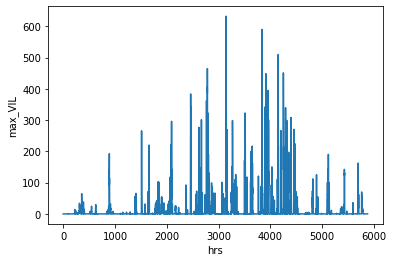

In [57]:
plt.plot(entire_VIL.values())
plt.ylabel('max_VIL')
plt.xlabel('hrs')
plt.show()

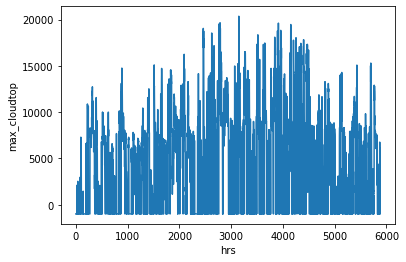

In [58]:
plt.plot(entire_cloudtop.values())
plt.ylabel('max_cloudtop')
plt.xlabel('hrs')
plt.show()